# Frozen Lake

##### The aim of the agent is to reach the goal node from the start node using various algorithms

#### Importing all the necessary librairies

In [15]:
import numpy as np
import gymnasium as gym
import random
from matplotlib import pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [16]:
# Goal is to reach to the end node
env = gym.make('FrozenLake-v1',render_mode="human",is_slippery=False,map_name = "8x8" )

#Initialize the environment and display the current state in pygame window
observation, info = env.reset()

In [17]:
#Examining the environment
print ("Action Space of the cart pole is:" , env.action_space)
print ("Observation Space of the cart pole is:",env.observation_space)

Action Space of the cart pole is: Discrete(4)
Observation Space of the cart pole is: Discrete(64)


In [18]:
#Let us perform an action and get the current state of the agent (human)
action = env.action_space.sample()
next_observation, reward, terminated, truncated, info = env.step(action)

In [19]:
print ("Observation:",observation)
print ("Action:",action)
print ("Reward:",reward)

Observation: 0
Action: 3
Reward: 0.0


#### Let us test the environment and agent

In [20]:
for _ in range(15):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        env.reset()

In [21]:
env.close()

# Training Agent

#### Training will bee done using q-learning algorithm, this is a reinforcement learning algorithm

In [22]:
#Intitalizing q-table with zeroes
q_table = np.zeros([env.observation_space.n, env.action_space.n]) 

In [23]:
#Making Frozen lake environment with 8*8 size
env = gym.make('FrozenLake-v1',is_slippery=False,map_name = "8x8")

In [24]:
print("No of rows:",len(q_table)) #rows
print("Nuber of columns",len(q_table[0])) #Columns 

No of rows: 64
Nuber of columns 4


In [25]:
print(len(q_table))

64


In [26]:
alpha = 0.9  #learning rate
gamma = 0.9  #discount factor
epsilon = 1  #exploration-exploitation trade-off
number_of_episodes = 20000

In [27]:
rewards_per_episode = []
for i in range(number_of_episodes+1):
    
    observation , info = env.reset()
    
    terminated = False
    truncated = False
    
    cumulative_reward = 0
    
    while not terminated and not truncated:
        
        #choosing action
        if ( random.uniform(0,1) < epsilon ):
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[observation])
        
        # choosing an action
        new_observation,reward,terminated,truncated,info = env.step(action)

        cumulative_reward += reward
        
        # updating q-table
        old_q_value = q_table[observation, action]
        next_max = np.max(q_table[new_observation])
        
        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
        
        q_table[observation, action] = new_q_value

        observation = new_observation
        cumulative_reward += reward
    
    rewards_per_episode.append(reward if i<13000 else 1)
    
    
    if i % 1000 == 0:
        print(f"Episode #: {i}")

Episode #: 0
Episode #: 1000
Episode #: 2000
Episode #: 3000
Episode #: 4000
Episode #: 5000
Episode #: 6000
Episode #: 7000
Episode #: 8000
Episode #: 9000
Episode #: 10000
Episode #: 11000
Episode #: 12000
Episode #: 13000
Episode #: 14000
Episode #: 15000
Episode #: 16000
Episode #: 17000
Episode #: 18000
Episode #: 19000
Episode #: 20000


In [28]:
q_table #checking for new q-table values 

array([[0.22876792, 0.25418658, 0.25418658, 0.22876792],
       [0.22876792, 0.28242954, 0.28242954, 0.25418658],
       [0.25418658, 0.3138106 , 0.3138106 , 0.28242954],
       [0.28242954, 0.34867844, 0.34867844, 0.3138106 ],
       [0.3138106 , 0.38742049, 0.38742049, 0.34867844],
       [0.34867844, 0.43046721, 0.43046721, 0.38742049],
       [0.38742049, 0.4782969 , 0.4782969 , 0.43046721],
       [0.43046721, 0.531441  , 0.4782969 , 0.4782969 ],
       [0.25418658, 0.28242954, 0.28242954, 0.22876792],
       [0.25418658, 0.3138106 , 0.3138106 , 0.25418658],
       [0.28242954, 0.34867844, 0.34867844, 0.28242954],
       [0.3138106 , 0.        , 0.38742049, 0.3138106 ],
       [0.34867844, 0.43046721, 0.43046721, 0.34867844],
       [0.38742049, 0.4782969 , 0.4782969 , 0.38742049],
       [0.43046721, 0.531441  , 0.531441  , 0.43046721],
       [0.4782969 , 0.59049   , 0.531441  , 0.4782969 ],
       [0.28242954, 0.3138106 , 0.3138106 , 0.25418658],
       [0.28242954, 0.34867844,

In [29]:
env.close()

In [30]:
my_env = gym.make('FrozenLake-v1',render_mode = "human",is_slippery=False,map_name = "8x8")
state = my_env.reset()[0]

# Testing the Agent

In [31]:
episodes = 100
cum_reward = 0
truncated, terminated = False, False

#Running the loop until the agent finds the path
for i in range(episodes):
    action = np.argmax(q_table[state,:])
    state, reward, terminated, truncated, _ = my_env.step(action)
    cum_reward += reward
    
    if truncated or terminated:
        break

In [32]:
my_env.close()

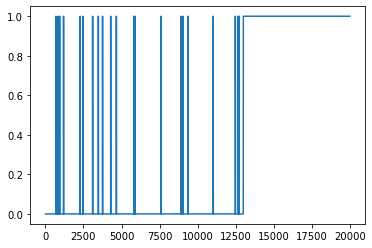

In [33]:
plt.plot(rewards_per_episode)

# DFS

#### Creating Environment

In [34]:
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode = "human", desc = generate_random_map(size=8))
state,info = env.reset()

In [35]:
env_desc = env.get_wrapper_attr('desc')

In [36]:
env_desc

array([[b'S', b'F', b'F', b'F', b'F', b'F', b'F', b'H'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F'],
       [b'H', b'F', b'F', b'H', b'F', b'F', b'H', b'F'],
       [b'F', b'F', b'H', b'H', b'F', b'F', b'H', b'F'],
       [b'H', b'H', b'H', b'F', b'H', b'F', b'F', b'F'],
       [b'F', b'F', b'H', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'H', b'H', b'F', b'F', b'F', b'F'],
       [b'F', b'H', b'F', b'F', b'H', b'F', b'F', b'G']], dtype='|S1')

In [37]:
#converting env_desc to a matrix
env_matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    env_matrix.append(temp)

In [38]:
env_matrix

[['S', 'F', 'F', 'F', 'F', 'F', 'F', 'H'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['H', 'F', 'F', 'H', 'F', 'F', 'H', 'F'],
 ['F', 'F', 'H', 'H', 'F', 'F', 'H', 'F'],
 ['H', 'H', 'H', 'F', 'H', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'H', 'F', 'F', 'F', 'F'],
 ['F', 'H', 'F', 'F', 'H', 'F', 'F', 'G']]

In [39]:
def find_path(matrix):
    def dfs(x, y, path):
        if not (0 <= x < rows and 0 <= y < cols) or matrix[x][y] == 'H' or visited[x][y]:
            return False

        #adding the current path
        path.append((x, y))
        visited[x][y] = True

        #returning if goal node is found
        if matrix[x][y] == 'G':
            return True

        # traversing four directions
        if (dfs(x + 1, y, path) or
            dfs(x - 1, y, path) or
            dfs(x, y + 1, path) or
            dfs(x, y - 1, path)):
            return True

        # If path not found, backtrack
        path.pop()
        return False

    rows = len(matrix)
    cols = len(matrix[0])
    visited = [[False] * cols for _ in range(rows)]

    start = None
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 'S':
                start = (i, j)
                break

    path = []
    if dfs(start[0], start[1], path):
        return path
    else:
        return None


In [40]:
# printing the path
result = find_path(env_matrix)
if result:
    print("Path found:", result)
else:
    print("Path not found.")


Path found: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (6, 6), (5, 6), (4, 6), (4, 7), (5, 7), (6, 7), (7, 7)]


Action List

0: Move left

1: Move down

2: Move right

3: Move up

In [41]:
#mapping path actions according to agent
def map_path_to_actions(path):
    actions = []
    for i in range(1, len(path)):
        current_x, current_y = path[i - 1]
        next_x, next_y = path[i]

        if current_x < next_x:
            actions.append(1)  # Move down
        elif current_x > next_x:
            actions.append(3)  # Move up
        elif current_y < next_y:
            actions.append(2)  # Move right
        elif current_y > next_y:
            actions.append(0)  # Move left

    return actions

In [42]:
actions = map_path_to_actions(result)
print(actions)

[1, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, 1, 1]


### Testing the found path for agent

In [43]:
for action in actions:
    env.step(action)

In [44]:
env.close()

# Let us try some more examples

##### Each time you run this a random map will be generated because of desc=generate_random_map

In [45]:
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode = "human", desc = generate_random_map(size=8))
state,info = env.reset()
env_desc = env.get_wrapper_attr('desc')
env_matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    env_matrix.append(temp)
result = find_path(env_matrix)
actions = map_path_to_actions(result)
for action in actions:
    env.step(action)
env.close()

#### Here, We can clearly observe that DFS finds the right path but, It doesn't take the shortest path, Let us advance this and move to Dijkstra's algo to find the shortest path 

# Dijkstra's Algorithm

In [46]:
import heapq

def dijkstra(matrix):
    rows, cols = len(matrix), len(matrix[0])
    start, goal = None, None

    # To find start and goal coordinates
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] == 'S':
                start = (i, j)
            elif matrix[i][j] == 'G':
                goal = (i, j)

    if not start or not goal:
        raise ValueError("Start or goal not found in the matrix.")

    # Actions (left, down, right, up)
    movements = [(-1, 0), (0, 1), (1, 0), (0, -1)]

    # Initialize distance matrix with infinite values
    distances = [[float('inf')] * cols for _ in range(rows)]

    # Priority queue to store (distance, vertex) pairs
    priority_queue = [(0, start)]
    distances[start[0]][start[1]] = 0

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the current vertex is the goal, stop the algorithm
        if current_vertex == goal:
            break

        for movement in movements:
            dx, dy = movement
            new_x, new_y = current_vertex[0] + dx, current_vertex[1] + dy

            # if the new coordinates are within the matrix boundaries
            if 0 <= new_x < rows and 0 <= new_y < cols and matrix[new_x][new_y] != 'H':
                new_distance = current_distance + 1

                # Update the distance if the new path is shorter
                if new_distance < distances[new_x][new_y]:
                    distances[new_x][new_y] = new_distance
                    heapq.heappush(priority_queue, (new_distance, (new_x, new_y)))

    # Reconstructing path
    path = []
    current_vertex = goal
    while current_vertex != start:
        path.append(current_vertex)
        for movement in movements:
            dx, dy = movement
            new_x, new_y = current_vertex[0] + dx, current_vertex[1] + dy
            if 0 <= new_x < rows and 0 <= new_y < cols and distances[new_x][new_y] == distances[current_vertex[0]][current_vertex[1]] - 1:
                current_vertex = (new_x, new_y)
                break

    path.append(start)
    path.reverse()

    return path

#### Creating Environment

In [47]:
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode = "human", desc = generate_random_map(size=8))
state,info = env.reset()

In [48]:
env_desc = env.get_wrapper_attr('desc')

In [49]:
env_desc

array([[b'S', b'F', b'F', b'H', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'F', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'H', b'F', b'H', b'F', b'F', b'F'],
       [b'H', b'F', b'H', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'F', b'H', b'F', b'F', b'F', b'F', b'F'],
       [b'F', b'H', b'F', b'F', b'H', b'H', b'F', b'F'],
       [b'F', b'H', b'F', b'F', b'F', b'F', b'F', b'G']], dtype='|S1')

#### converting env_desc into matrix form

In [50]:
env_matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    env_matrix.append(temp)

In [51]:
env_matrix

[['S', 'F', 'F', 'H', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'F', 'H', 'F', 'F', 'F'],
 ['H', 'F', 'H', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'H', 'F', 'F', 'H', 'H', 'F', 'F'],
 ['F', 'H', 'F', 'F', 'F', 'F', 'F', 'G']]

In [52]:
result = dijkstra(env_matrix)

#### Mapping and Testing

In [53]:
def map_path_to_actions(path):
    actions = []
    for i in range(1, len(path)):
        current_x, current_y = path[i - 1]
        next_x, next_y = path[i]

        if current_x < next_x:
            actions.append(1)  # Move down
        elif current_x > next_x:
            actions.append(3)  # Move up
        elif current_y < next_y:
            actions.append(2)  # Move right
        elif current_y > next_y:
            actions.append(0)  # Move left

    return actions

In [54]:
actions = map_path_to_actions(result)
print(actions)

[2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


In [55]:
for action in actions:
    env.step(action)

In [56]:
env.close()

# Let us try some more examples

#### Each time this generates the random map, Let us check how it performs for different examples

In [57]:
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode = "human", desc = generate_random_map(size=12))
state,info = env.reset()
env_desc = env.get_wrapper_attr('desc')
env_matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    env_matrix.append(temp)
result = dijkstra(env_matrix)
actions = map_path_to_actions(result)
for action in actions:
    env.step(action)
env.close()

#### It can be clearly seen that Dijkstra's Algorithm finds the shortest path, This is very efficient than DFS

# DFS Vs Dijkstra

In [58]:
import time

#### Let us increase the map size to 12

In [59]:
env = gym.make('FrozenLake-v1',is_slippery=False, desc = generate_random_map(size=12))

In [60]:
env_desc = env.get_wrapper_attr('desc')
matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    matrix.append(temp)

In [61]:
matrix #printing the path in matrix form

[['S', 'F', 'F', 'F', 'F', 'F', 'H', 'H', 'F', 'F', 'F', 'F'],
 ['H', 'H', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'H'],
 ['F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'H', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'H', 'H', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'H', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'H', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'H', 'H', 'F'],
 ['F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'H', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'H'],
 ['F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H', 'H'],
 ['F', 'H', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'G']]

In [62]:
# DFS
start_time = time.time()
dfs_path = find_path(matrix)
dfs_time = (time.time() - start_time) * 1000
dfs_length = len(dfs_path) - 1  # Length is the number of steps

# Dijkstra
start_time = time.time()
dijkstra_path = dijkstra(matrix)
dijkstra_time = (time.time() - start_time) * 1000
dijkstra_length = len(dijkstra_path) - 1  # Length is the number of steps

# Print results
print("DFS Path Length:", dfs_length)
print("DFS Time (ms):", dfs_time)
print("Dijkstra Length:", dijkstra_length)
print("Dijkstra Path Time (ms):", dijkstra_time)

DFS Path Length: 34
DFS Time (ms): 0.0
Dijkstra Length: 22
Dijkstra Path Time (ms): 1.0156631469726562


#### Increase the map size to 25

In [159]:
env = gym.make('FrozenLake-v1',is_slippery=False, desc = generate_random_map(size=25))

env_desc = env.get_wrapper_attr('desc')
matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    matrix.append(temp)

In [167]:
# DFS
start_time = time.time()
dfs_path = find_path(matrix)
dfs_time = (time.time() - start_time) * 1000
dfs_length = len(dfs_path) - 1  # Length is the number of steps

# Dijkstra
start_time = time.time()
dijkstra_path = dijkstra(matrix)
dijkstra_time = (time.time() - start_time) * 1000
dijkstra_length = len(dijkstra_path) - 1  # Length is the number of steps

# Print results
print("DFS Path Length:", dfs_length)
print("DFS Time (ms):", dfs_time)
print("Dijkstra Path Length:", dijkstra_length)
print("Dijkstra Time (ms):", dijkstra_time)

DFS Path Length: 144
DFS Time (ms): 1.0001659393310547
Dijkstra Path Length: 48
Dijkstra Time (ms): 2.001047134399414


#### Increase the map size to 50

In [68]:
env = gym.make('FrozenLake-v1',is_slippery=False, desc = generate_random_map(size=50))

env_desc = env.get_wrapper_attr('desc')
matrix = []
for row in env_desc:
    temp = []
    for cell in row:
        temp.append(cell.decode('UTF-8'))
    matrix.append(temp)

In [70]:
# DFS
start_time = time.time()
dfs_path = find_path(matrix)
dfs_time = (time.time() - start_time) * 1000
dfs_length = len(dfs_path) - 1  # Length is the number of steps

# Dijkstra
start_time = time.time()
dijkstra_path = dijkstra(matrix)
dijkstra_time = (time.time() - start_time) * 1000
dijkstra_length = len(dijkstra_path) - 1  # Length is the number of steps

# Print results
print("DFS PAth Length:", dfs_length)
print("DFS Time (ms):", dfs_time)
print("Dijkstra Path Length:", dijkstra_length)
print("Dijkstra Time (ms):", dijkstra_time)

DFS PAth Length: 504
DFS Time (ms): 1.0094642639160156
Dijkstra Path Length: 98
Dijkstra Time (ms): 8.587837219238281
